# 1.2 Hypothesis Testing

### Setup

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load data

In [3]:
leukemia = pd.read_csv("../data/leukemia_big.csv")

In [4]:
leukemia.shape

(7128, 72)

In [5]:
leukemia.head()

,ALL,ALL.1,ALL.2,ALL.3,ALL.4,ALL.5,ALL.6,ALL.7,ALL.8,ALL.9,...,AML.15,AML.16,AML.17,AML.18,AML.19,AML.20,AML.21,AML.22,AML.23,AML.24
0,-1.533622,-0.867610,-0.433172,-1.671903,-1.187689,-1.127234,-1.045409,-0.106917,-1.198796,-1.190899,...,-0.436650,-1.274708,-0.681458,-0.876610,-0.624022,-0.431628,-1.435259,-0.671954,-1.013161,-0.969482
1,-1.235673,-1.275501,-1.184492,-1.596424,-1.335256,-1.113730,-0.800880,-0.745177,-0.849312,-1.190899,...,-0.915483,-1.354363,-0.653559,-1.096250,-1.066594,-1.335256,-1.204586,-0.751457,-0.889592,-1.080988
2,-0.333983,0.375927,-0.459196,-1.422571,-0.797493,-1.362768,-0.671954,-1.175674,0.320813,0.646610,...,-0.736156,-0.022153,-0.037455,-0.567335,-1.100749,-0.552938,-0.948874,-0.231657,-0.742163,-0.779500
3,0.488702,0.444011,0.436264,0.193353,0.235632,-0.360312,0.184941,0.425653,0.333983,0.235270,...,0.083781,0.356562,0.416241,0.533986,0.227505,0.416816,0.408202,0.326556,0.361813,0.298864
4,-1.300893,-1.229660,-1.325882,-1.818329,-1.311206,-1.513975,-1.651624,-1.339555,-0.593132,0.133302,...,-1.547444,-1.264475,-1.512318,-1.469583,-1.283472,-0.977672,-1.090178,-1.545120,-1.174272,-1.443183


### Figure 1.4

Collect ALL and AML values

In [6]:
cols_all = [col for col in leukemia.columns if col.startswith("ALL")]
values_all = leukemia.loc[135, cols_all].values

In [7]:
cols_aml = [col for col in leukemia.columns if col.startswith("AML")]
values_aml = leukemia.loc[135, cols_aml].values

Make plot

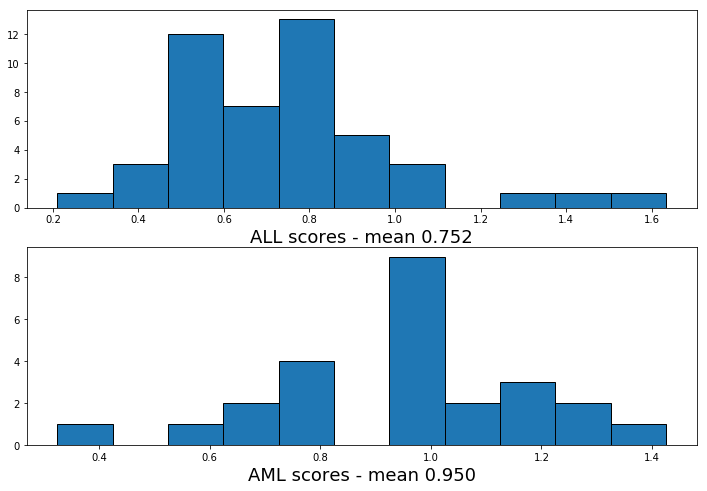

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

ax[0].hist(values_all, bins=11, edgecolor="k")
ax[0].set_xlabel("ALL scores - mean {:>.3f}".format(values_all.mean()), size=18);

ax[1].hist(values_aml, bins=11, edgecolor="k")
ax[1].set_xlabel("AML scores - mean {:>.3f}".format(values_aml.mean()), size=18);

### t-test

In [9]:
from scipy import stats

In [10]:
t_val, p_val = stats.ttest_ind(values_aml, values_all)

In [11]:
print("t = {:>.2f};  p = {:>.4f}".format(t_val, p_val))

t = 3.01;  p = 0.0036


### Figure 1.5

t statistics

In [12]:
t_values = []
for _, row in leukemia.iterrows():
    values_all = row[cols_all].values
    values_aml = row[cols_aml].values
    t, _ = stats.ttest_ind(values_aml, values_all)
    t_values.append(t)

Distrubtion values

In [13]:
dist_x = np.arange(-10, 10, 0.1)
dist_t = stats.t.pdf(dist_x, df=70)

Plot

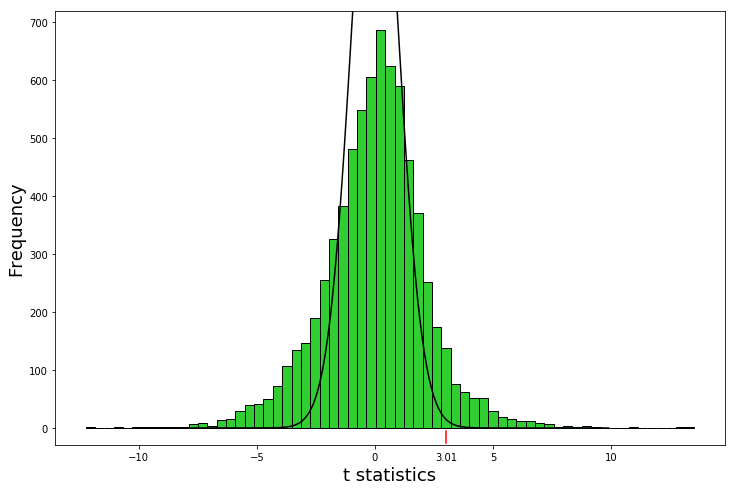

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))

hist_info = ax.hist(t_values, bins=65, edgecolor="k", facecolor="limegreen")
bin_y, bin_x = hist_info[0], hist_info[1]
hist_area = ((bin_x[1:] - bin_x[:-1]) * bin_y).sum()

ax.plot(dist_x, dist_t * hist_area, c="k")

ax.set_xticks([t_val], minor=True)
ax.set_xticklabels([np.round(t_val, 2)], minor=True)
ax.tick_params(axis='both', which='minor', length=4, color="white")

ax.plot([t_val, t_val], [-5, -25], c="r")

ax.set_xlabel("t statistics", size=18)
ax.set_ylabel("Frequency", size=18)
ax.set_ylim(-30, 720);

It looks like the binning here is slightly different from the book's.